In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
class SLP:
      def __init__(self,
                 nH:int,
                 Activation:str):
        self.nH = nH # number of neurons
        if Activation == 'relu':
            self.Activation = lambda x: (x + np.abs(x)) / 2
            self.dActivation = lambda y: (np.sign(y) + 1) / 2
        elif Activation == 'l-relu':
            self.Activation = lambda x: (1.02 * x + 0.98 * np.abs(x)) / 2
            self.dActivation = lambda y: 0.98 * (np.sign(y) + 1) / 2 + 0.02

      def InitializeParameters(self):
        self.W1 = np.random.uniform(low=-2,
                                    high=+2,
                                    size=(self.nX, self.nH))
        self.B1 = np.random.uniform(low=-2,
                                    high=+2,
                                    size=(self.nH, ))
        self.Wo = np.random.uniform(low=-2,
                                    high=+2,
                                    size=(self.nH, self.nY))
        self.Bo = np.random.uniform(low=-2,
                                    high=+2,
                                    size=(self.nY, ))  
        print(self.W1)

      def fPropagate(self,
                   X:np.ndarray) -> tuple:
        Z1 = np.dot(X, self.W1) + self.B1
        O1 = self.Activation(Z1)
        Zo = np.dot(O1, self.Wo) + self.Bo
        Oo = Zo
        return O1, Oo

      def bPropagate(self,
                   x:np.ndarray,
                   y:np.ndarray):
        O1, Oo = self.fPropagate(x)
        # Hidden Layer Weight Update
        for i in range(self.nX):
            for j in range(self.nH):
                dj = np.inner(self.Wo[j, :], (y - Oo))
                self.W1[i, j] += self.lr * x[i] * self.dActivation(O1[j]) * dj
        # Hidden Layer Bias Update
        for j in range(self.nH):
            dj = np.inner(self.Wo[j, :], (y - Oo))
            self.B1[j] += self.lr * self.dActivation(O1[j]) * dj
        # Output Layer Weight Update
        for j in range(self.nH):
            for k in range(self.nY):
                dk = y[k] - Oo[k]
                self.Wo[j, k] += self.lr * O1[j] * dk
        # Output Layer Bias Update
        for k in range(self.nY):
            dk = y[k] - Oo[k]
            self.Bo[k] += self.lr * dk
      def Fit(self,
            X:np.ndarray,
            Y:np.ndarray,
            nEpoch:int,
            lr:float):
        self.nEpoch = nEpoch
        self.lr = lr
        self.nX = X.shape[1]
        self.nY = Y.shape[1]
        self.Log = np.zeros((nEpoch + 1, self.nY))
        self.InitializeParameters()
        _, Oo = self.fPropagate(X)
        MSE = np.mean((Y - Oo) ** 2, axis=0)
        RMSE = MSE ** 0.5
        NRMSE = 100 * RMSE / (Y.max(axis=0) - Y.min(axis=0))
        self.Log[0, :] = NRMSE
        print(f'Epoch: 0/{nEpoch} -- Loss: {np.round(NRMSE, 2)} %')
        for Epoch in range(1, nEpoch + 1):
            for x, y in zip(X, Y):
                self.bPropagate(x, y)
            _, Oo = self.fPropagate(X)
            MSE = np.mean((Y - Oo) ** 2, axis=0)
            RMSE = MSE ** 0.5
            NRMSE = 100 * RMSE / (Y.max(axis=0) - Y.min(axis=0))
            self.Log[Epoch, :] = NRMSE
            print(f'Epoch: {Epoch}/{nEpoch} -- Loss: {np.round(NRMSE, 2)} %')
      def Predict(self,
                X:np.ndarray) -> np.ndarray:
        _, Oo = self.fPropagate(X)
        return Oo
          


In [ ]:
np.random.seed(0)
plt.style.use('ggplot')
X = np.random.uniform(low=-np.pi,
                      high=+np.pi,
                      size=(100, 1))
Y = np.sin(X)

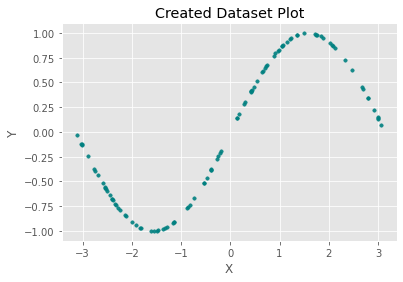

In [ ]:
plt.scatter(X,
            Y,
            s=12,
            marker='o',
            c='teal',
            alpha=0.9)
plt.title('Created Dataset Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
Model = SLP(20, 'l-relu')
Model.Fit(X, Y, 300, 1e-3)
#Model.W1[0,1]=20
#Model.W1[0,5]=30

[[ 0.71126615 -0.91996811  0.94077609  1.84875418 -1.00498743  0.30462934
   0.36816773  0.28900762 -1.10767347  1.81099605 -0.21149849  1.38563469
   0.7979171  -0.8102522   1.25519128 -0.41397704  1.52441279  0.32509149
   1.52694145  0.77012636]]
Epoch: 0/300 -- Loss: [507.34] %
Epoch: 1/300 -- Loss: [41.15] %
Epoch: 2/300 -- Loss: [25.93] %
Epoch: 3/300 -- Loss: [20.8] %
Epoch: 4/300 -- Loss: [17.88] %
Epoch: 5/300 -- Loss: [16.03] %
Epoch: 6/300 -- Loss: [14.73] %
Epoch: 7/300 -- Loss: [13.74] %
Epoch: 8/300 -- Loss: [12.94] %
Epoch: 9/300 -- Loss: [12.27] %
Epoch: 10/300 -- Loss: [11.71] %
Epoch: 11/300 -- Loss: [11.23] %
Epoch: 12/300 -- Loss: [10.81] %
Epoch: 13/300 -- Loss: [10.44] %
Epoch: 14/300 -- Loss: [10.12] %
Epoch: 15/300 -- Loss: [9.82] %
Epoch: 16/300 -- Loss: [9.56] %
Epoch: 17/300 -- Loss: [9.32] %
Epoch: 18/300 -- Loss: [9.11] %
Epoch: 19/300 -- Loss: [8.93] %
Epoch: 20/300 -- Loss: [8.76] %
Epoch: 21/300 -- Loss: [8.61] %
Epoch: 22/300 -- Loss: [8.47] %
Epoch: 23

In [ ]:
Model.W1

array([[ 0.43899105, 20.        ,  0.7610305 ,  1.59711569, -0.79331507,
        30.        ,  0.36834047,  0.22187648, -0.97266073,  1.32642274,
        -0.41104842,  1.12816691,  1.28113399, -0.71289178,  1.56927376,
        -0.05492564,  1.31844006,  0.31116115,  1.61858497,  1.04769559]])

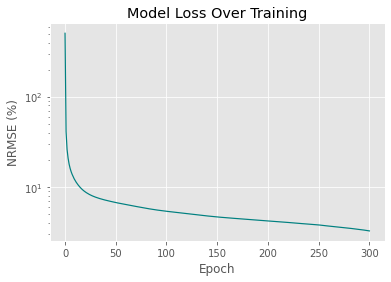

In [ ]:
T = np.arange(start=0,
              stop=Model.nEpoch + 1,
              step=1)
plt.plot(T,
         Model.Log,
         ls='-',
         lw=1.2,
         c='teal')
plt.title('Model Loss Over Training')
plt.xlabel('Epoch')
plt.ylabel('NRMSE (%)')
plt.yscale('log')
plt.show()

In [ ]:

X2 = np.linspace(start=-np.pi, stop=+np.pi, num=201).reshape(-1, 1)
Y2 = np.sin(X2)
P2 = Model.Predict(X2)

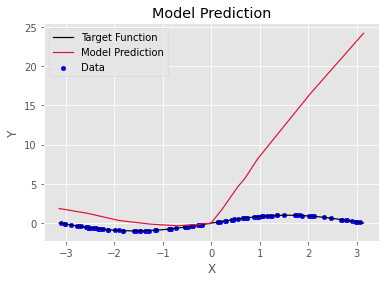

In [ ]:
plt.scatter(X,
            Y,
            s=20,
            marker='o',
            c='b',
            label='Data')
plt.plot(X2,
         Y2,
         ls='-',
         lw=1.2,
         c='k',
         label='Target Function')
plt.plot(X2,
         P2,
         ls='-',
         lw=1.2,
         c='crimson',
         label='Model Prediction')
plt.title('Model Prediction')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:

X = np.random.uniform(low=-np.pi,
                      high=+np.pi,
                      size=(300, 3))

Y = np.zeros((300, 2))

Y[:, 0] = X[:, 0] * X[:, 1] / 8
Y[:, 1] = (-X[:, 0] +  X[:, 1] + 1.2 * X[:, 2]) / 7.5

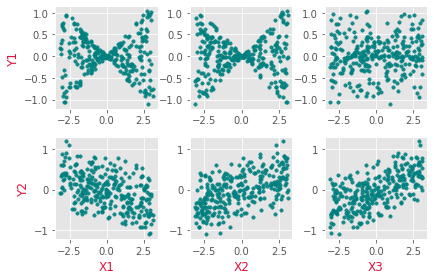

In [ ]:
k = 1

for i in range(Y.shape[1]):
    for j in range(X.shape[1]):
        plt.subplot(2, 3, k)
        plt.scatter(X[:, j],
                    Y[:, i],
                    s=12,
                    marker='o',
                    c= 'teal',
                    alpha=0.9)
        if i == Y.shape[1] - 1:
            plt.xlabel(f'X{j + 1}', fontdict={'color':'crimson'})
        if j == 0:
            plt.ylabel(f'Y{i + 1}', fontdict={'color':'crimson'})
        k += 1

plt.tight_layout()
plt.show()

In [ ]:
Model = SLP(50, 'l-relu')
Model.Fit(X, Y, 300, 1e-3)

[[-0.32545255 -1.97875981 -1.95457949  0.04488715 -1.66683608 -1.79569808
   1.86206656  1.43601056 -1.39189109 -1.99734313  1.76667118 -0.88669881
  -1.25640959  0.76603243 -1.56438504 -0.94140161  1.90037872  0.5578511
   0.08271117 -0.40832554  1.09800382 -1.43617009  1.86935121  1.44449203
   0.47062793 -1.82837524  0.8034226   1.65313736  0.09830827 -0.58310071
  -1.51889062  1.01960442  1.5400874  -1.59899302  1.03593822 -1.93175805
   1.86821967  0.46023208  0.20975624 -0.81620067  1.71716669 -0.93637749
   1.31258645  1.94043472  1.13358658  0.07595968 -1.73570294 -0.11034484
  -0.24697621 -1.18881584]
 [-0.30564945 -0.56896846 -1.34526296 -0.23450343 -0.94880017  0.08824968
  -1.85935976  1.62492568  1.26545722  0.21032533  1.40723433  1.8495803
  -1.55791082  0.52332723  1.991976    1.95155668  0.41329197 -1.48791652
   0.33277132 -1.99174146 -1.20435466  1.82449264 -0.67823771  0.55356042
  -0.87656202  1.79128755  0.91423492 -0.68139537  1.16704568 -1.5673379
  -0.43072424 

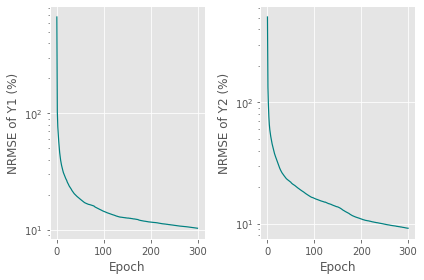

In [ ]:
T = np.arange(start=0,
              stop=Model.nEpoch + 1,
              step=1)

for i in range(Model.nY):
    plt.subplot(1, 2, i + 1)
    plt.plot(T,
             Model.Log[:, i],
             ls='-',
             lw=1.2,
             c='teal')
    plt.xlabel('Epoch')
    plt.ylabel(f'NRMSE of Y{i + 1} (%)')
    plt.yscale('log')

plt.tight_layout()
plt.show()

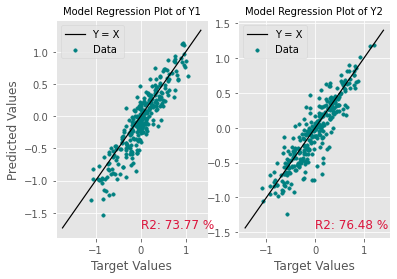

In [ ]:
P = Model.Predict(X)

for i in range(Model.nY):
    MSE = np.mean((Y[:, i] - P[:, i]) ** 2)
    R2 = 100 * (1 - MSE / Y[:, i].var())
    plt.subplot(1, 2, i + 1)
    a = min(Y[:, i].min(), P[:, i].min()) - 0.2
    b = max(Y[:, i].max(), P[:, i].max()) + 0.2
    ab = np.array([a, b])
    plt.scatter(Y[:, i], P[:, i], s=12, marker='o', c='teal', label='Data')
    plt.plot(ab, ab, ls='-', lw=1.2, c='k', label='Y = X')
    plt.text(0, a, f'R2: {R2:.2f} %', fontdict={'size':12, 'color':'crimson'})
    plt.title(f'Model Regression Plot of Y{i + 1}', fontdict={'size':10})
    plt.xlabel('Target Values')
    if i == 0:
        plt.ylabel('Predicted Values')
    plt.legend()

plt.show()

In [ ]:
Model.W1[0:1,:]=0
Model.W1

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.26830607, -1.22142009, -0.98153206, -0.45437169, -1.08287554,
        -0.72486687, -1.721048  ,  0.95482196,  1.3890811 ,  0.37005143,
         0.69875947,  1.92519476, -1.38796163,  0.73261547,  1.76435819,
         1.45482033,  0.32573248, -0.96385565,  0.

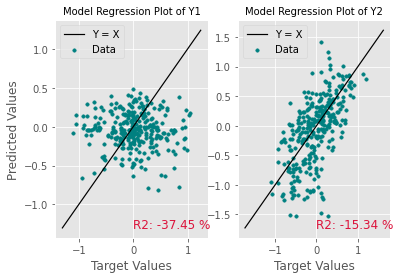

In [ ]:
P = Model.Predict(X)

for i in range(Model.nY):
    MSE = np.mean((Y[:, i] - P[:, i]) ** 2)
    R2 = 100 * (1 - MSE / Y[:, i].var())
    plt.subplot(1, 2, i + 1)
    a = min(Y[:, i].min(), P[:, i].min()) - 0.2
    b = max(Y[:, i].max(), P[:, i].max()) + 0.2
    ab = np.array([a, b])
    plt.scatter(Y[:, i], P[:, i], s=12, marker='o', c='teal', label='Data')
    plt.plot(ab, ab, ls='-', lw=1.2, c='k', label='Y = X')
    plt.text(0, a, f'R2: {R2:.2f} %', fontdict={'size':12, 'color':'crimson'})
    plt.title(f'Model Regression Plot of Y{i + 1}', fontdict={'size':10})
    plt.xlabel('Target Values')
    if i == 0:
        plt.ylabel('Predicted Values')
    plt.legend()

plt.show()